In [2]:
!pip install faker pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.2 MB/s eta 0:00:00


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import random
from faker import Faker
from datetime import datetime, timedelta

def generate_data():
    faker = Faker()
    categories = [
        {"category": "Groceries and Food"},
        {"category": "Housing and Utilities"},
        {"category": "Transportation"},
        {"category": "Personal Care and Health"},
        {"category": "Entertainment and Leisure"},
        {"category": "Education"},
        {"category": "Vehicle Repair and Maintenance"},
        {"category": "Party and Fun"},
        {"category": "Part Payment Purchases"},
        {"category": "Life Insurance and Financial Services"},
        {"category": "Loans and Credit"}
    ]

    reasons = [
        {"reason": "Tuition fee payment for a school or college", "category_ID": 6},
        {"reason": "Purchase of textbooks and study materials", "category_ID": 6},
        {"reason": "Online course or workshop fee", "category_ID": 6},
        {"reason": "Payment for car service or maintenance", "category_ID": 7},
        {"reason": "Purchase of spare parts for a vehicle", "category_ID": 7},
        {"reason": "Payment for a car wash", "category_ID": 7},
        {"reason": "Purchase of party supplies (decorations, balloons)", "category_ID": 8},
        {"reason": "Payment for event tickets (concerts, festivals)", "category_ID": 8},
        {"reason": "Renting a venue for a party", "category_ID": 8},
        {"reason": "Purchase of vegetables and fruits from a local market", "category_ID": 1},
        {"reason": "Payment for a meal at a restaurant", "category_ID": 1},
        {"reason": "Buying snacks and beverages from a convenience store", "category_ID": 1},
        {"reason": "Monthly rent payment", "category_ID": 2},
        {"reason": "Electricity bill payment", "category_ID": 2},
        {"reason": "Water bill payment", "category_ID": 2},
        {"reason": "Fuel purchase for a car", "category_ID": 3},
        {"reason": "Payment for a public transport ticket (bus, train)", "category_ID": 3},
        {"reason": "Ride-sharing service payment (e.g., Uber, Lyft)", "category_ID": 3},
        {"reason": "Purchase of toiletries and personal care products", "category_ID": 4},
        {"reason": "Payment for a doctor's appointment", "category_ID": 4},
        {"reason": "Buying prescription medicines from a pharmacy", "category_ID": 4},
        {"reason": "Subscription fee for a streaming service (e.g., Netflix, Spotify)", "category_ID": 5},
        {"reason": "Payment for a movie ticket", "category_ID": 5},
        {"reason": "Purchase of a book or magazine", "category_ID": 5},
        {"reason": "Initial down payment for an installment plan (e.g., electronics)", "category_ID": 9},
        {"reason": "Monthly installment payment for a purchased item", "category_ID": 9},
        {"reason": "Payment for a financed home appliance", "category_ID": 9},
        {"reason": "Monthly premium payment for life insurance", "category_ID": 10},
        {"reason": "Payment for health insurance premiums", "category_ID": 10},
        {"reason": "Contribution to a retirement fund", "category_ID": 10},
        {"reason": "Monthly mortgage payment", "category_ID": 2},
        {"reason": "Payment for a personal loan installment", "category_ID": 11},
        {"reason": "Credit card bill payment", "category_ID": 11}
    ]

    userData = []
    start_date = datetime(2018, 1, 1)
    end_date = datetime(2025, 12, 31)
    date_generated = [start_date + timedelta(days=x) for x in range(0, (end_date - start_date).days + 1)]

    user_id_counter = 1
    total_users = random.randint(5, 20)

    spenders_ids = []
    savers_ids = []

    for _ in range(total_users):
        incomes = []
        expenses = []
        expense_id_counter = 1

        # Random income pattern
        num_income_sources = random.randint(1, 5)
        total_income = 0
        for _ in range(num_income_sources):
            income_amount = round(random.uniform(500, 15000), 2)
            total_income += income_amount
            incomes.append({
                'source_name': faker.job(),
                'amount': income_amount,
                'frequency': random.choice(['weekly', 'monthly', 'yearly']),
                'description': faker.sentence()
            })

        # Random expense pattern with dynamic behavior
        total_expense = 0
        for _ in range(random.randint(50, 200)):  # Randomize number of expenses
            reason = random.choice(reasons)
            category = categories[reason['category_ID'] - 1]['category']
            expense_amount = round(random.uniform(10, 500), 2)
            total_expense += expense_amount
            expenses.append({
                'expense_id': expense_id_counter,
                'expense_date': random.choice(date_generated).strftime("%Y-%m-%d"),
                'reason_id': reason['category_ID'],
                'amount': expense_amount,
                'description': reason['reason'],
                'reason_text': reason['reason'],
                'category_name': category
            })
            expense_id_counter += 1

        # Adjustments for more realistic spenders/savers
        case_type = random.choice(["spender", "saver", "balanced"])
        if case_type == "saver":
            total_income *= random.uniform(1.2, 2.0)
        elif case_type == "spender":
            total_expense *= random.uniform(1.2, 2.0)
        else:
            total_income, total_expense = max(total_income, total_expense), max(total_income, total_expense)

        # Categorize users
        if total_income > total_expense:
            savers_ids.append({"user_ID": user_id_counter, "total_income": total_income, "total_expense": total_expense})
        else:
            spenders_ids.append({"user_ID": user_id_counter, "total_income": total_income, "total_expense": total_expense})

        # Append user data
        userData.append({
            'user_ID': user_id_counter,
            'user_name': faker.name(),
            'user_email': faker.email(),
            'incomes': incomes,
            'expenses': expenses
        })
        user_id_counter += 1

    print("Savers:", savers_ids)
    print("Spenders:", spenders_ids)

    return userData

# Generate data and save to a JSON file
user_data = generate_data()

with open('user_data.json', 'w') as f:
    json.dump(user_data, f, indent=2)

print("Data saved to user_data.json")


Savers: [{'user_ID': 1, 'total_income': 45594.7731825278, 'total_expense': 36131.75}, {'user_ID': 4, 'total_income': 71189.33255746892, 'total_expense': 40523.39}, {'user_ID': 6, 'total_income': 44218.88164386329, 'total_expense': 17823.619999999995}, {'user_ID': 16, 'total_income': 56127.95051634882, 'total_expense': 24297.48}, {'user_ID': 17, 'total_income': 44217.3497146512, 'total_expense': 35379.98}, {'user_ID': 20, 'total_income': 43511.78902355448, 'total_expense': 29441.150000000012}]
Spenders: [{'user_ID': 2, 'total_income': 34571.56, 'total_expense': 47934.59006731236}, {'user_ID': 3, 'total_income': 35373.21000000001, 'total_expense': 35373.21000000001}, {'user_ID': 5, 'total_income': 34056.17, 'total_expense': 34056.17}, {'user_ID': 7, 'total_income': 48133.119999999966, 'total_expense': 48133.119999999966}, {'user_ID': 8, 'total_income': 12825.400000000001, 'total_expense': 21007.35533202366}, {'user_ID': 9, 'total_income': 25273.390000000003, 'total_expense': 62657.806140

In [5]:
import pandas as pd
import json

# Load the JSON file
with open('user_data.json', 'r') as f:
    user_data = json.load(f)

# Normalize the data
users = []
incomes = []
expenses = []

for user in user_data:
    # Extract user details
    user_id = user['user_ID']
    users.append({
        'user_ID': user_id,
        'user_name': user['user_name'],
        'user_email': user['user_email']
    })

    # Extract income details
    for income in user['incomes']:
        incomes.append({
            'user_ID': user_id,
            'source_name': income['source_name'],
            'amount': income['amount'],
            'frequency': income['frequency'],
            'description': income['description']
        })

    # Extract expense details
    for expense in user['expenses']:
        expenses.append({
            'user_ID': user_id,
            'expense_id': expense['expense_id'],
            'expense_date': expense['expense_date'],
            'reason_id': expense['reason_id'],
            'amount': expense['amount'],
            'description': expense['description'],
            'reason_text': expense['reason_text'],
            'category_name': expense['category_name']
        })

# Convert to DataFrames
users_df = pd.DataFrame(users)
incomes_df = pd.DataFrame(incomes)
expenses_df = pd.DataFrame(expenses)

# Save normalized data to CSV files (optional)
users_df.to_csv('users.csv', index=False)
incomes_df.to_csv('incomes.csv', index=False)
expenses_df.to_csv('expenses.csv', index=False)

# Display normalized data
print("Users Data:")
print(users_df.head())
print("\nIncomes Data:")
print(incomes_df.head())
print("\nExpenses Data:")
print(expenses_df.head())


Users Data:
   user_ID        user_name                  user_email
0        1    Theresa Perez  sarahmacdonald@example.org
1        2    Joshua Cannon   collinsamanda@example.com
2        3     Deborah Reid    stephenclark@example.com
3        4  Richard Kaufman     ashleylynch@example.net
4        5     Dakota Davis     brownalicia@example.com

Incomes Data:
   user_ID             source_name    amount frequency  \
0        1       Personnel officer   4582.86    weekly   
1        1   Glass blower/designer   1701.89   monthly   
2        1        Surveyor, mining   3144.86   monthly   
3        1          Therapist, art    792.48   monthly   
4        1  Holiday representative  13905.27   monthly   

                                         description  
0               Per everything exist character whom.  
1  Daughter accept carry section our training pre...  
2     Indicate owner reality democratic wall mother.  
3  Southern help art stay near understand follow ...  
4            

Epoch [10/50], Loss: 0.6440
Epoch [20/50], Loss: 0.5643
Epoch [30/50], Loss: 0.4766
Epoch [40/50], Loss: 0.3860
Epoch [50/50], Loss: 0.2910
Accuracy: 100.00%
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          total_expense   No. Observations:                 1622
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11376.447
Date:                Wed, 18 Dec 2024   AIC                          22764.895
Time:                        03:33:41   BIC                          22797.240
Sample:                             0   HQIC                         22776.898
                               - 1622                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9134      0.02

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpftsctnhe/i31w0zz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpftsctnhe/dinjrtyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85791', 'data', 'file=/tmp/tmpftsctnhe/i31w0zz6.json', 'init=/tmp/tmpftsctnhe/dinjrtyp.json', 'output', 'file=/tmp/tmpftsctnhe/prophet_modelwi7cj95c/prophet_model-20241218033342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Forecast:
             ds        yhat  yhat_lower  yhat_upper
1622 2025-12-31  330.102452    5.761121  638.676243
1623 2026-01-01  362.065792   38.884838  674.470228
1624 2026-01-02  357.202548   40.967782  683.369803
1625 2026-01-03  366.856839   48.570765  674.331159
1626 2026-01-04  396.492675   72.769460  740.854222
1627 2026-01-05  370.500963   56.032269  678.191312
1628 2026-01-06  365.218973   40.308595  695.548109
1629 2026-01-07  341.245459   14.160378  638.551436
1630 2026-01-08  371.847153   51.373423  689.207762
1631 2026-01-09  365.620355   26.968434  676.784539
1632 2026-01-10  373.975245   79.917659  694.315762
1633 2026-01-11  402.435876   91.272353  753.326977
1634 2026-01-12  375.445225   52.299304  699.567757
1635 2026-01-13  369.382979   57.677809  698.320764
1636 2026-01-14  344.879331    3.397818  664.109920
1637 2026-01-15  375.220521   63.377718  707.120272
1638 2026-01-16  369.009884   42.003362  697.024932
1639 2026-01-17  377.652036   87.432123  718.8

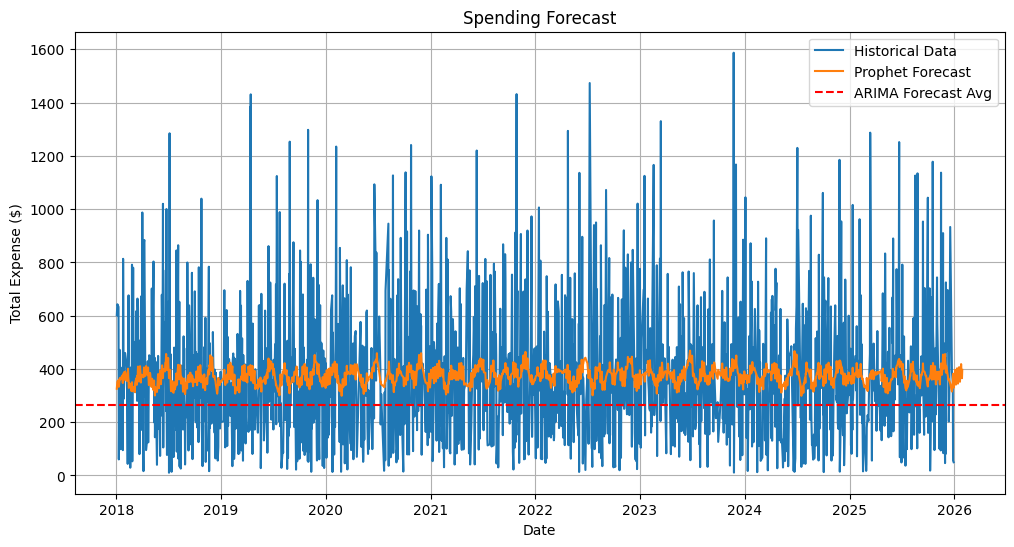

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load normalized data
users_df = pd.read_csv('users.csv')
incomes_df = pd.read_csv('incomes.csv')
expenses_df = pd.read_csv('expenses.csv')

# Preprocess data
def preprocess_data(incomes_df, expenses_df):
    # Aggregate total income per user
    income_agg = incomes_df.groupby('user_ID').agg(total_income=('amount', 'sum')).reset_index()

    # Aggregate total expenses per user per category
    expense_agg = expenses_df.groupby(['user_ID', 'category_name']).agg(total_expense=('amount', 'sum')).reset_index()

    # Pivot expense data to create one column per category
    expense_pivot = expense_agg.pivot(index='user_ID', columns='category_name', values='total_expense').fillna(0)

    # Merge income and expense data
    data = income_agg.merge(expense_pivot, on='user_ID', how='left').fillna(0)

    # Calculate net savings or loss
    data['net_savings'] = data['total_income'] - data.iloc[:, 2:].sum(axis=1)

    return data

def time_series_preparation(expenses_df):
    # Aggregate daily expenses
    expenses_df['expense_date'] = pd.to_datetime(expenses_df['expense_date'])
    daily_expenses = expenses_df.groupby('expense_date').agg(total_expense=('amount', 'sum')).reset_index()

    return daily_expenses

# Prepare data
data = preprocess_data(incomes_df, expenses_df)
daily_expenses = time_series_preparation(expenses_df)

# Prepare features for regression
X = data.drop(columns=['user_ID', 'net_savings'])
y = (data['net_savings'] > 0).astype(int)  # 1 if saving, 0 if losing

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Define the neural network model
class ForecastingNN(nn.Module):
    def __init__(self, input_size):
        super(ForecastingNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize neural network
input_size = X_train.shape[1]
model = ForecastingNN(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the neural network
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred >= 0.5).float()
    accuracy = (y_pred_class == y_test).sum() / y_test.size(0)
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')

# Save the neural network model
torch.save(model.state_dict(), 'forecasting_model.pth')

# Time-series forecasting with ARIMA
arima_model = ARIMA(daily_expenses['total_expense'], order=(5, 1, 0))
arima_result = arima_model.fit()
print("ARIMA Model Summary:")
print(arima_result.summary())

# Forecasting with ARIMA
arima_forecast = arima_result.forecast(steps=30)  # Forecast for the next 30 days
print("ARIMA Forecast:")
print(arima_forecast)

# Time-series forecasting with Prophet
prophet_data = daily_expenses.rename(columns={'expense_date': 'ds', 'total_expense': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)
print("Prophet Forecast:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

# Regression with Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())
rf_predictions = rf_model.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("Random Forest MAE:", mean_absolute_error(y_test, rf_predictions))

# Regression with XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train.ravel())
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_predictions)))
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_predictions))

# Visualize ARIMA and Prophet Forecasts
plt.figure(figsize=(12, 6))
plt.plot(daily_expenses['expense_date'], daily_expenses['total_expense'], label='Historical Data')
plt.plot(future['ds'], forecast['yhat'], label='Prophet Forecast')
plt.axhline(arima_forecast.mean(), color='r', linestyle='--', label='ARIMA Forecast Avg')
plt.legend()
plt.title("Spending Forecast")
plt.xlabel("Date")
plt.ylabel("Total Expense ($)")
plt.grid()
plt.show()


## Analytics with the Predictions per week month and yaer

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import pandas as pd
import json
import threading

# Load the trained model
class ForecastingNN(nn.Module):
    def __init__(self, input_size):
        super(ForecastingNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Load the model
input_size = 12  # Updated based on the number of input features during training
model = ForecastingNN(input_size)
model.load_state_dict(torch.load('forecasting_model.pth', map_location=torch.device('cpu')))
model.eval()

# Load the sample data
with open('users.json', 'r') as f:
    sample_data = json.load(f)

# Memory for tracking threads
active_threads = {}

# Preprocess the data
def preprocess_user_data(user):
    # Aggregate income and expenses
    total_income = sum(item['amount'] for item in user['incomes'])
    category_expenses = {}
    for expense in user['expenses']:
        category = expense['category_name']
        category_expenses[category] = category_expenses.get(category, 0) + expense['amount']

    # Prepare input features
    categories = sorted(category_expenses.keys())
    features = [total_income] + [category_expenses.get(category, 0) for category in categories]
    return features, total_income, sum(category_expenses.values())

# Forecast future spending
def forecast_spending(total_income, total_expense):
    weekly_expense = total_expense / 7
    monthly_expense = weekly_expense * 30  # Approximate
    yearly_expense = weekly_expense * 365  # Approximate

    # Predictions in words
    forecast = (
        f"If you continue spending at the current rate:\n"
        f"- Weekly spending will be approximately ${weekly_expense:.2f}.\n"
        f"- Monthly spending will be approximately ${monthly_expense:.2f}.\n"
        f"- Yearly spending will be approximately ${yearly_expense:.2f}.\n"
    )

    if total_income > yearly_expense:
        forecast += "You are on track to save money annually. Keep up the good financial habits!"
    else:
        forecast += "Warning: At this rate, your expenses will exceed your income. Consider revising your spending habits."

    return forecast

# Analysis function
def analyze_user(user_id, user_data):
    if user_id in active_threads:
        print(f"Analysis for User ID {user_id} is already in progress.")
        return

    def worker():
        try:
            print(f"Starting analysis for User ID {user_id}...")
            features, total_income, total_expense = preprocess_user_data(user_data)

            # Normalize features
            scaler = StandardScaler()
            features = scaler.fit_transform([features])
            features = torch.tensor(features, dtype=torch.float32)

            # Predict using the model
            with torch.no_grad():
                prediction = model(features).item()

            # Generate human-readable insights
            if prediction >= 0.5:
                savings_rate = (total_income - total_expense) / total_income * 100
                print(f"User ID {user_id}: You are saving at a rate of {savings_rate:.2f}%. If you continue, you will save approximately ${total_income - total_expense:.2f}. Keep up the good work!")
            else:
                overspend_rate = (total_expense - total_income) / total_income * 100
                print(f"User ID {user_id}: Warning! You are spending {overspend_rate:.2f}% more than your income. At this rate, you are overspending approximately ${total_expense - total_income:.2f}. Please pay attention to your expenses.")

            # Forecast future spending
            forecast = forecast_spending(total_income, total_expense)
            print(forecast)

        finally:
            # Remove thread from active threads
            del active_threads[user_id]

    # Create and start a thread for analysis
    thread = threading.Thread(target=worker)
    active_threads[user_id] = thread
    thread.start()

# CLI for user analysis
while True:
    user_id = input("Enter User ID to analyze (or 'exit' to quit): ")
    if user_id.lower() == 'exit':
        break

    try:
        user_id = int(user_id)
    except ValueError:
        print("Invalid input. Please enter a numeric User ID.")
        continue

    user_data = next((user for user in sample_data if user['user_ID'] == user_id), None)

    if user_data:
        analyze_user(user_id, user_data)
    else:
        print(f"No data found for User ID {user_id}.")


<ipython-input-7-71b62dfe3f27>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('forecasting_model.pth', map_location=torch.device('cpu')))

FileNotFoundError: [Errno 2] No such file or directory: 'users.json'

## Analytics with the graph data and predictions


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import pandas as pd
import json
import threading

# Load the trained model
class ForecastingNN(nn.Module):
    def __init__(self, input_size):
        super(ForecastingNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Load the model
input_size = 12  # Updated based on the number of input features during training
model = ForecastingNN(input_size)
model.load_state_dict(torch.load('forecasting_model.pth', map_location=torch.device('cpu')))
model.eval()

# Load the sample data
with open('users.json', 'r') as f:
    sample_data = json.load(f)

# Memory for tracking threads
active_threads = {}

# Preprocess the data
scaler = StandardScaler()  # Global scaler to match training normalization
def preprocess_user_data(user):
    # Aggregate income and expenses
    total_income = sum(item['amount'] for item in user['incomes'])
    category_expenses = {}
    for expense in user['expenses']:
        category = expense['category_name']
        category_expenses[category] = category_expenses.get(category, 0) + expense['amount']

    # Prepare input features
    categories = sorted(category_expenses.keys())
    features = [total_income] + [category_expenses.get(category, 0) for category in categories]
    return features, total_income, sum(category_expenses.values())

# Forecast future spending
def forecast_spending(total_income, total_expense):
    weekly_expense = total_expense / 7
    monthly_expense = weekly_expense * 30  # Approximate
    yearly_expense = weekly_expense * 365  # Approximate

    # Predictions in words
    forecast = (
        f"If you continue spending at the current rate:\n"
        f"- Weekly spending will be approximately ${weekly_expense:.2f}.\n"
        f"- Monthly spending will be approximately ${monthly_expense:.2f}.\n"
        f"- Yearly spending will be approximately ${yearly_expense:.2f}.\n"
    )

    if total_income > yearly_expense:
        forecast += "You are on track to save money annually. Keep up the good financial habits!"
    else:
        forecast += "Warning: At this rate, your expenses will exceed your income. Consider revising your spending habits."

    return forecast, weekly_expense, monthly_expense, yearly_expense

# Generate and display spending data for charts
def generate_chart_data(user_id, weekly_expense, monthly_expense, yearly_expense):
    weekly_data = [weekly_expense] * 7
    monthly_data = [weekly_expense * i for i in range(1, 31)]
    yearly_data = [weekly_expense * i for i in range(1, 366)]

    print(f"\nChart Data for User ID {user_id}:")

    print("01. Chart Weekly:")
    print("X: Days of the Week")
    print("Y: Spending Amount ($)")
    print([f"Day {i+1}" for i in range(7)])
    print(weekly_data)

    print("\n02. Chart Monthly:")
    print("X: Days of the Month")
    print("Y: Spending Amount ($)")
    print([f"Day {i+1}" for i in range(30)])
    print(monthly_data[:30])

    print("\n03. Chart Yearly:")
    print("X: Days of the Year")
    print("Y: Spending Amount ($)")
    print([f"Day {i+1}" for i in range(365)])
    print(yearly_data)

# Analysis function
def analyze_user(user_id, user_data):
    if user_id in active_threads:
        print(f"Analysis for User ID {user_id} is already in progress.")
        return

    def worker():
        try:
            print(f"Starting analysis for User ID {user_id}...")
            features, total_income, total_expense = preprocess_user_data(user_data)

            # Normalize features
            features = scaler.fit_transform([features])
            features = torch.tensor(features, dtype=torch.float32)

            # Predict using the model
            with torch.no_grad():
                prediction = model(features).item()

            # Generate human-readable insights
            if prediction >= 0.7:
                savings_rate = (total_income - total_expense) / total_income * 100
                print(f"User ID {user_id}: You are saving at a high rate of {savings_rate:.2f}%. Excellent financial discipline!")
            elif 0.5 <= prediction < 0.7:
                print(f"User ID {user_id}: You are maintaining balanced finances with a modest saving trend. Keep it steady!")
            else:
                overspend_rate = (total_expense - total_income) / total_income * 100
                print(f"User ID {user_id}: Warning! You are overspending by {overspend_rate:.2f}%. Consider reducing expenses!")

            # Forecast future spending
            forecast, weekly_expense, monthly_expense, yearly_expense = forecast_spending(total_income, total_expense)
            print(forecast)

            # Generate and display chart data
            generate_chart_data(user_id, weekly_expense, monthly_expense, yearly_expense)

        finally:
            # Remove thread from active threads
            del active_threads[user_id]

    # Create and start a thread for analysis
    thread = threading.Thread(target=worker)
    active_threads[user_id] = thread
    thread.start()

# CLI for user analysis
while True:
    user_id = input("Enter User ID to analyze (or 'exit' to quit): ")
    if user_id.lower() == 'exit':
        break

    try:
        user_id = int(user_id)
    except ValueError:
        print("Invalid input. Please enter a numeric User ID.")
        continue

    user_data = next((user for user in sample_data if user['user_ID'] == user_id), None)

    if user_data:
        analyze_user(user_id, user_data)
    else:
        print(f"No data found for User ID {user_id}.")


<ipython-input-32-a349c993f8b5>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('forecasting_model.pth', map_location=torch.device('cpu'))

Enter User ID to analyze (or 'exit' to quit): 2
Starting analysis for User ID 2...
User ID 2: Warning! You are overspending by 45770.92%. Consider reducing expenses!
If you continue spending at the current rate:
- Weekly spending will be approximately $435987.39.
- Monthly spending will be approximately $13079621.61.
- Yearly spending will be approximately $159135396.31.

Chart Data for User ID 2:
01. Chart Weekly:
X: Days of the Week
Y: Spending Amount ($)
['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
[435987.38714285713, 435987.38714285713, 435987.38714285713, 435987.38714285713, 435987.38714285713, 435987.38714285713, 435987.38714285713]

02. Chart Monthly:
X: Days of the Month
Y: Spending Amount ($)
['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12', 'Day 13', 'Day 14', 'Day 15', 'Day 16', 'Day 17', 'Day 18', 'Day 19', 'Day 20', 'Day 21', 'Day 22', 'Day 23', 'Day 24', 'Day 25', 'Day 26', 'Day 27', 'Day 28

KeyboardInterrupt: Interrupted by user